In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, classification_report

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y = cancer.target

In [6]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
X_train.shape

(455, 30, 1)

In [12]:
ip_shape = X_train.shape[1:3]
epochs = 200

In [30]:
es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   verbose=1,
                   mode='min',
                   min_delta=0.001)

In [38]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, padding='valid', activation='relu', input_shape= ip_shape))
model.add(BatchNormalization())
model.add(Dropout(0.50))

model.add(Conv1D(filters=32, kernel_size=2, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.60))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.50))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.60))

model.add(Dense(units=1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 29, 64)            192       
_________________________________________________________________
batch_normalization_8 (Batch (None, 29, 64)            256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 29, 64)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 28, 32)            4128      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_15 (Dropout)         (None, 28, 32)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 896)              

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, 
                    batch_size=4, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, y_test), 
                    callbacks=[es])

Epoch 1/200
114/114 [==============================] - 0s 4ms/step - loss: 1.4579 - accuracy: 0.5055 - val_loss: 0.6439 - val_accuracy: 0.6404
Epoch 2/200
114/114 [==============================] - 0s 3ms/step - loss: 1.2801 - accuracy: 0.5736 - val_loss: 0.5903 - val_accuracy: 0.6754
Epoch 3/200
114/114 [==============================] - 0s 3ms/step - loss: 1.1027 - accuracy: 0.6264 - val_loss: 0.5147 - val_accuracy: 0.7632
Epoch 4/200
114/114 [==============================] - 0s 3ms/step - loss: 0.9477 - accuracy: 0.6462 - val_loss: 0.4282 - val_accuracy: 0.8684
Epoch 5/200
114/114 [==============================] - 0s 3ms/step - loss: 0.7931 - accuracy: 0.6857 - val_loss: 0.3658 - val_accuracy: 0.9035
Epoch 6/200
114/114 [==============================] - 0s 3ms/step - loss: 0.8003 - accuracy: 0.6747 - val_loss: 0.3221 - val_accuracy: 0.9386
Epoch 7/200
114/114 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.7165 - val_loss: 0.2876 - val_accuracy: 0.9386

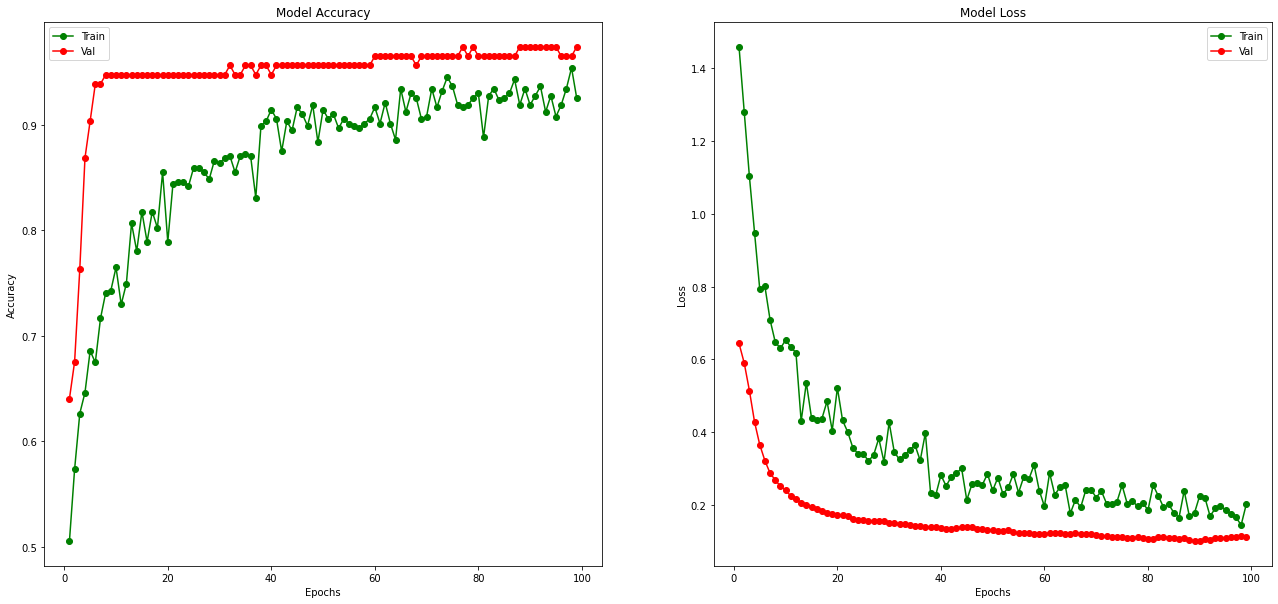

In [42]:
x = range(1,len(history.history['loss'])+1)

fig = plt.figure(figsize=(22,10))

ax1 = fig.add_subplot(121)
ax1.plot(x, history.history['accuracy'], 'go-', label='Train')
ax1.plot(x, history.history['val_accuracy'], 'ro-', label='Val')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(x, history.history['loss'], 'go-', label='Train')
ax2.plot(x, history.history['val_loss'], 'ro-', label='Val')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig.get_tight_layout()
fig.show()

In [43]:
y_pred = model.predict_classes(X_test)
y_pred = y_pred.reshape(1,-1)[0]

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

